## Import Datasets

In [1]:
import os

# Add ffmpeg to PATH (replace with your ffmpeg bin path)
ffmpeg_path = "C:\\ffmpeg\\ffmpeg-master-latest-win64-gpl-shared\\bin"  # Example for Windows
os.environ['PATH'] += os.pathsep + ffmpeg_path

# Verify
print(os.environ['PATH'])

C:\Python3.11\Scripts\;C:\Python3.11\;C:\windows\system32;C:\windows;C:\windows\System32\Wbem;C:\windows\System32\WindowsPowerShell\v1.0\;C:\windows\System32\OpenSSH\;C:\Program Files\PuTTY\;C:\Program Files\Git\cmd;C:\Program Files\MATLAB\R2023a\bin;C:\mingw64\bin;C:\Program Files\MySQL\MySQL Shell 8.0\bin\;C:\Python310\Scripts\;C:\Python310\;C:\Users\franz\AppData\Local\Microsoft\WindowsApps;C:\Program Files\JetBrains\PyCharm Community Edition 2022.3.1\bin;C:\Users\franz\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\franz\AppData\Roaming\TinyTeX\bin\windows;C:\ffmpeg\ffmpeg-master-latest-win64-gpl-shared\bin;;C:\ffmpeg\ffmpeg-master-latest-win64-gpl-shared\bin


In [2]:
# Verify that ffmpeg is installed

!ffmpeg -version

ffmpeg version N-118586-g629e8a2425-20250301 Copyright (c) 2000-2025 the FFmpeg developers
built with gcc 14.2.0 (crosstool-NG 1.26.0.120_4d36f27)
configuration: --prefix=/ffbuild/prefix --pkg-config-flags=--static --pkg-config=pkg-config --cross-prefix=x86_64-w64-mingw32- --arch=x86_64 --target-os=mingw32 --enable-gpl --enable-version3 --disable-debug --enable-shared --disable-static --disable-w32threads --enable-pthreads --enable-iconv --enable-zlib --enable-libfreetype --enable-libfribidi --enable-gmp --enable-libxml2 --enable-lzma --enable-fontconfig --enable-libharfbuzz --enable-libvorbis --enable-opencl --disable-libpulse --enable-libvmaf --disable-libxcb --disable-xlib --enable-amf --enable-libaom --enable-libaribb24 --enable-avisynth --enable-chromaprint --enable-libdav1d --enable-libdavs2 --enable-libdvdread --enable-libdvdnav --disable-libfdk-aac --enable-ffnvcodec --enable-cuda-llvm --enable-frei0r --enable-libgme --enable-libkvazaar --enable-libaribcaption --enable-libass -

In [3]:
import pandas as pd
import numpy as np
import os
import numpy as np
from pydub import AudioSegment
from pydub.utils import mediainfo

animal_name_translation = {'cat':'cat',
                          'dog':'dog',
                          'aslan':'lion',
                          'esek':'donkey',
                          'inek':'cow',
                          'koyun':'baby sheep',
                          'kurbaga':'frog',
                          'Kus':'bird',
                          'maymun':'monkey',
                          'tavuk':'chicken',
                          'bird':'bird'}

# Define a custom class to store audio data
class AudioFile:
    def __init__(self, file_name, audio_data, sample_rate, label, breed):
        self.file_name = file_name   # Unique Identifier
        self.audio_data = audio_data
        self.sample_rate = sample_rate
        self.label = label
        self.breed = breed

    def __repr__(self):
        return f"AudioFile(file_name={self.file_name}, label={self.label}, sample_rate={self.sample_rate}, audio_data_shape={self.audio_data.shape})"

# Path to the folder containing .wav files
folder_path = "audio_data"

audio_files = []

# List all audio files in the folder
for folder in os.listdir(folder_path):
    for file in os.listdir(f"{folder_path}\\{folder}"):
        if file.endswith('.wav') or file.endswith('.flac'):
            audio_files.append(f"{folder}\\{file}")

# Create a list to store AudioFile objects
audio_objects = []

# Load each .wav or .mp3 file and store as an AudioFile object
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)
    print(f"Loading {file_path}")

    # Use pydub to read the audio file
    audio = AudioSegment.from_file(file_path)
    y = np.array(audio.get_array_of_samples())  # Convert to numpy array
    y = y.astype(np.float32) / (2**15)  # Normalize to [-1, 1] for 16-bit PCM
    sr = audio.frame_rate  # Get sample rate

    #print(f"Loaded {wav_file} with sample rate {sr} and {len(y)} samples")

    # Extract label from the folder name
    filename = os.path.basename(file_path)

    label = animal_name_translation[filename.split('_')[0]]

    # If there are more words
    if filename.split('_')[0] == 'bird' and len(filename.split('_')) > 2:
        breed = filename.split('_')[1:-1]
        breed = '_'.join(breed)
        # print(breed)
    else:
        breed = np.nan

    # Create an AudioFile object and store it
    audio_objects.append(AudioFile(audio_file, y, sr, label, breed))

# Check every 100th audio object
for audio_object in audio_objects[::100]:
    print(audio_object)

Loading audio_data\Aslan\aslan_1.wav
Loading audio_data\Aslan\aslan_10.wav
Loading audio_data\Aslan\aslan_11.wav
Loading audio_data\Aslan\aslan_12.wav
Loading audio_data\Aslan\aslan_13.wav
Loading audio_data\Aslan\aslan_14.wav
Loading audio_data\Aslan\aslan_15.wav
Loading audio_data\Aslan\aslan_16.wav
Loading audio_data\Aslan\aslan_17.wav
Loading audio_data\Aslan\aslan_18.wav
Loading audio_data\Aslan\aslan_2.wav
Loading audio_data\Aslan\aslan_20.wav
Loading audio_data\Aslan\aslan_21.wav
Loading audio_data\Aslan\aslan_22.wav
Loading audio_data\Aslan\aslan_23.wav
Loading audio_data\Aslan\aslan_24.wav
Loading audio_data\Aslan\aslan_25.wav
Loading audio_data\Aslan\aslan_26.wav
Loading audio_data\Aslan\aslan_27.wav
Loading audio_data\Aslan\aslan_29.wav
Loading audio_data\Aslan\aslan_3.wav
Loading audio_data\Aslan\aslan_30.wav
Loading audio_data\Aslan\aslan_31.wav
Loading audio_data\Aslan\aslan_32.wav
Loading audio_data\Aslan\aslan_33.wav
Loading audio_data\Aslan\aslan_34.wav
Loading audio_d

## Visualize Waveform

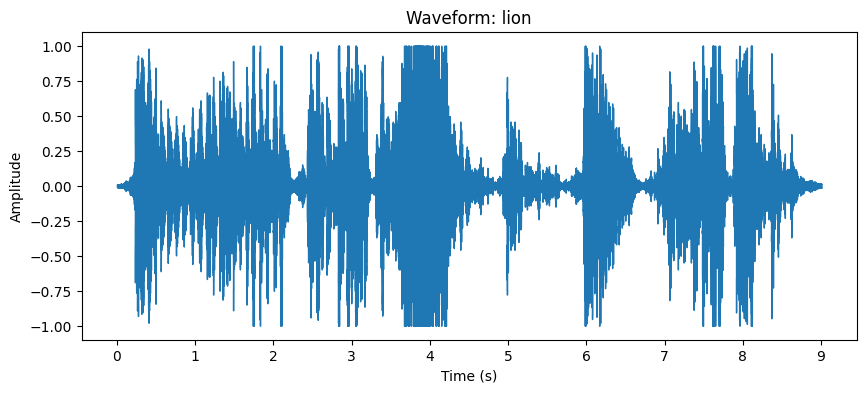

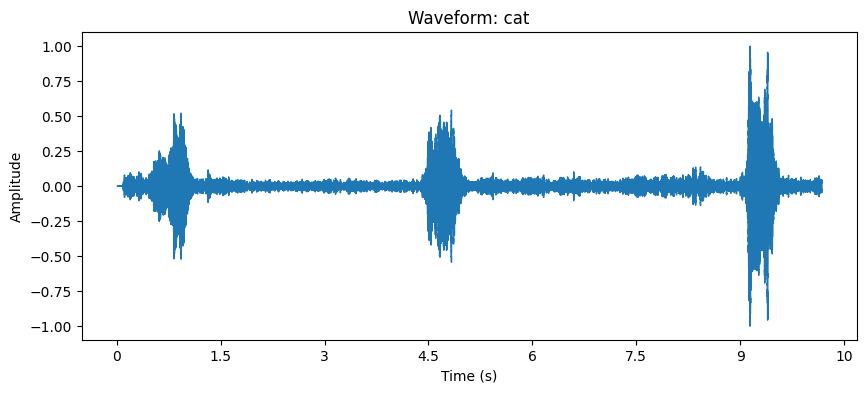

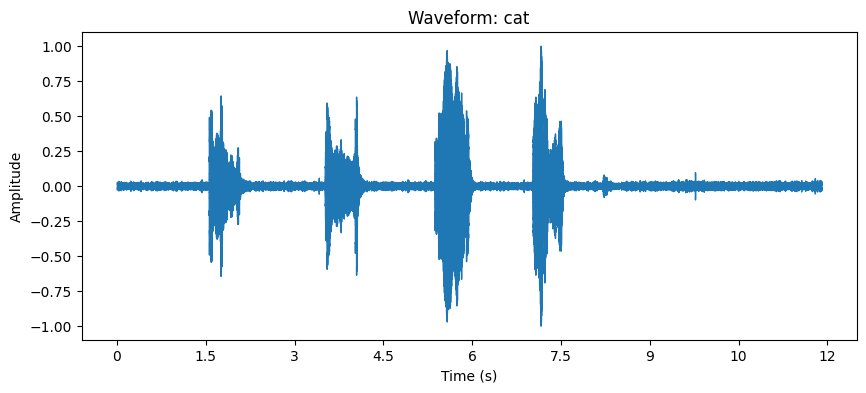

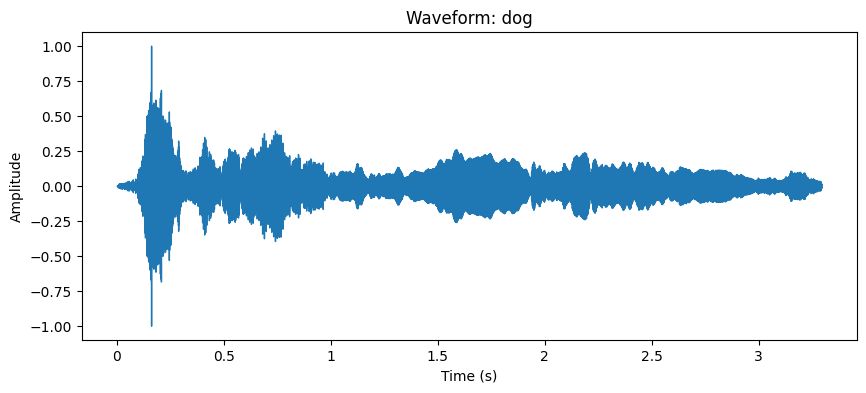

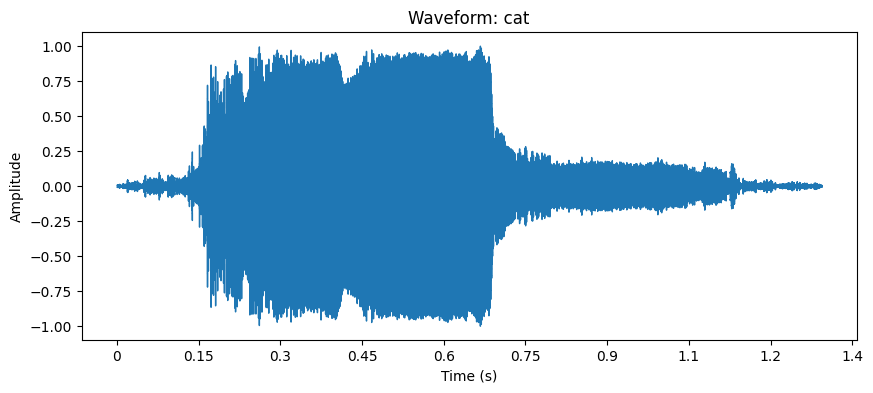

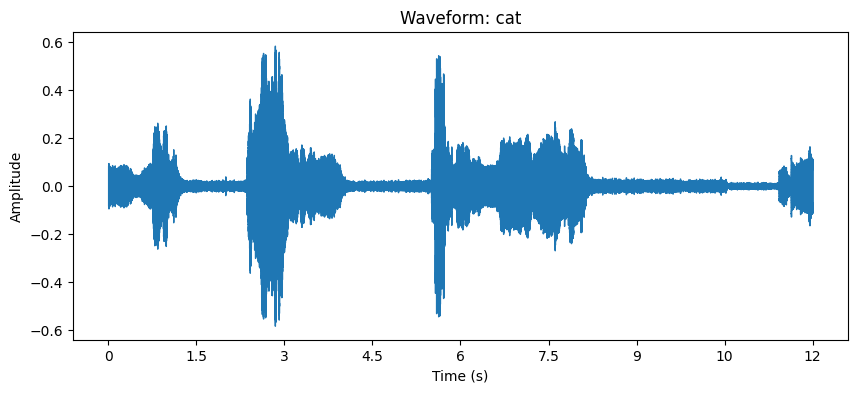

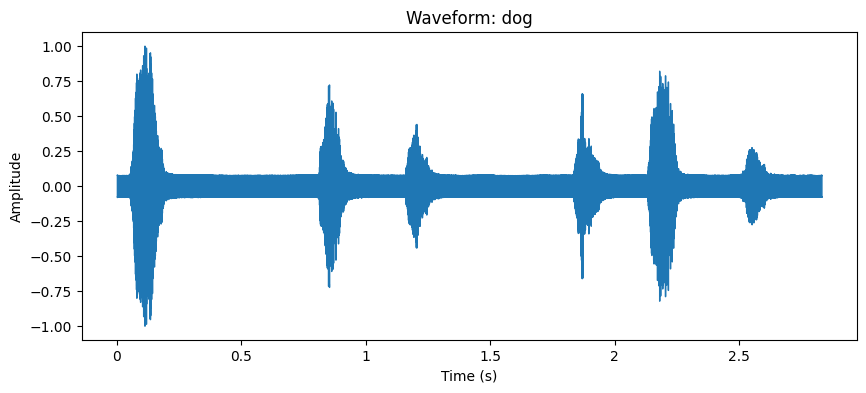

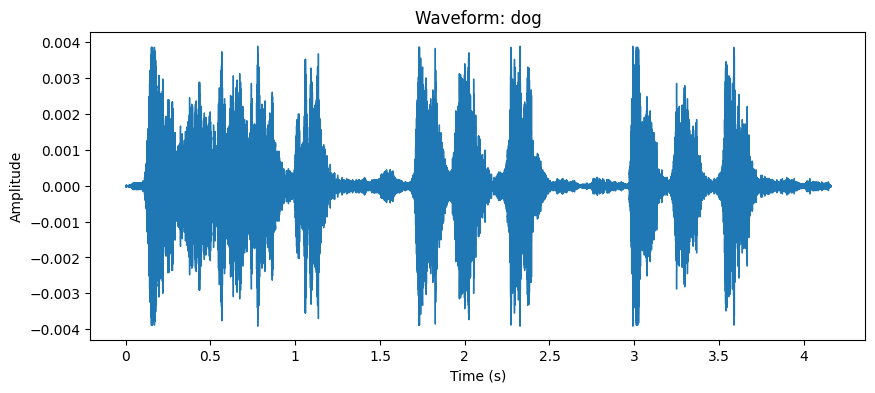

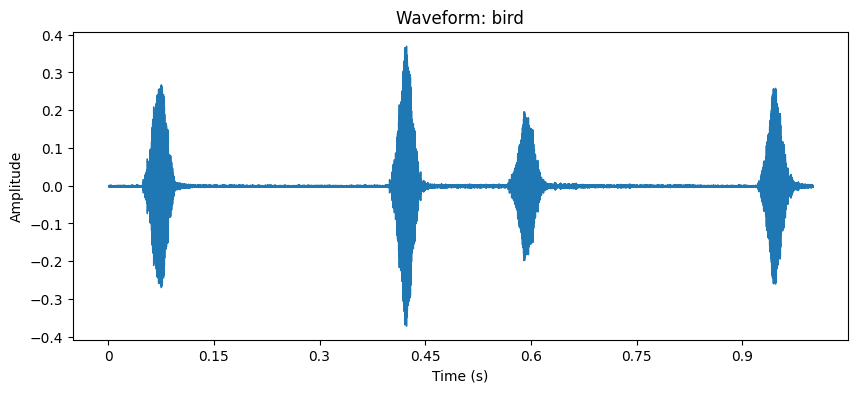

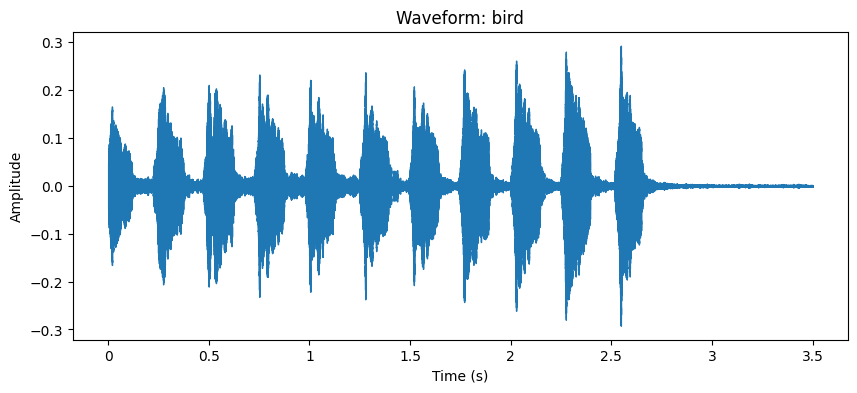

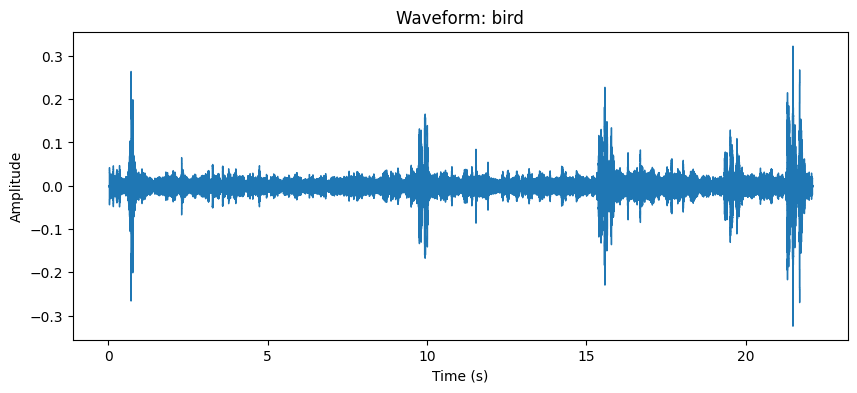

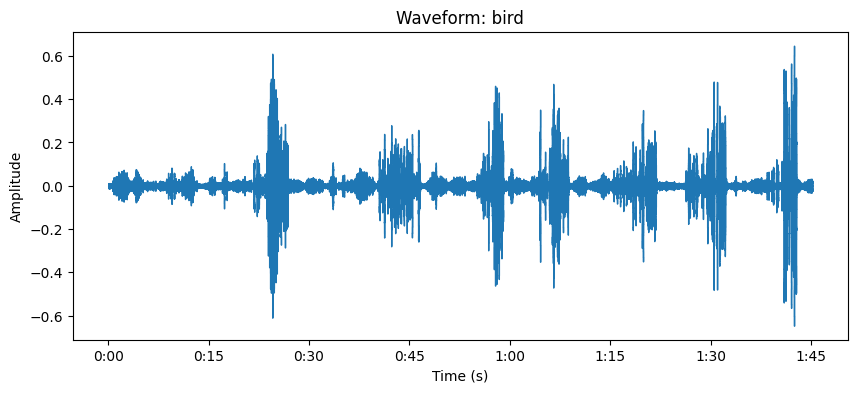

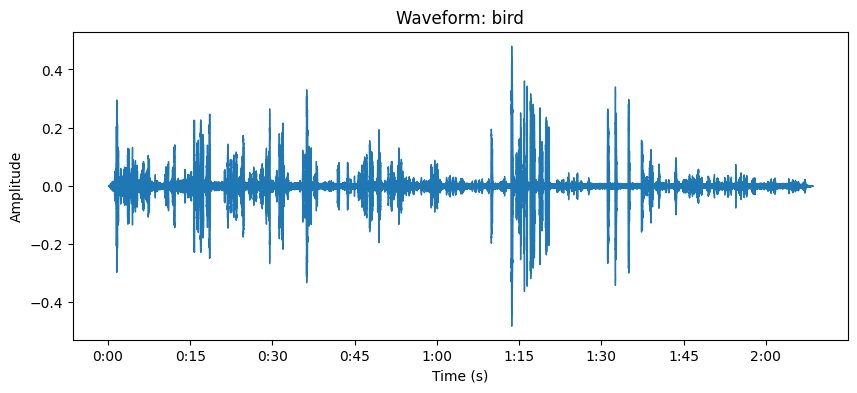

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Sample every 100th audio object
for sample in audio_objects[::100]:
    y = sample.audio_data
    sr = sample.sample_rate
    
    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform: {sample.label}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

## Data Preprocessing
Goals:<br>
(1) Convert list of audio files into a dataframe<br>
(2) Extract MFCC<br>
(3) Split train/test<br>

### Convert list of AudioFile objects into dataframe

In [5]:
# Features of interest:
# (file_name, label, audio_data, sample_rate)

# Convert to DataFrame
data = {
    "file_name": [audio_object.file_name for audio_object in audio_objects],
    "audio_data": [audio_object.audio_data for audio_object in audio_objects],
    "sample_rate": [audio_object.sample_rate for audio_object in audio_objects],
    "label": [audio_object.label for audio_object in audio_objects],
    "breed": [audio_object.breed for audio_object in audio_objects]
}

audio_df = pd.DataFrame(data)

# Display the DataFrame
print(audio_df)

               file_name                                         audio_data  \
0      Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1     Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3     Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4     Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   
...                  ...                                                ...   
1272  Tavuk\tavuk_27.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1273  Tavuk\tavuk_28.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1274   Tavuk\tavuk_3.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1275   Tavuk\tavuk_6.wav  [0.0, -3.0517578e-05, -3.0517578e-05, -3.05175...   
1276   Tavuk\tavuk_7.wav  [-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...   

      sample_rate    label breed  
0           2205

In [6]:
audio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file_name    1277 non-null   object
 1   audio_data   1277 non-null   object
 2   sample_rate  1277 non-null   int64 
 3   label        1277 non-null   object
 4   breed        264 non-null    object
dtypes: int64(1), object(4)
memory usage: 50.0+ KB


### Mel Spectrogram

In [15]:
import librosa
import numpy as np

def generate_mel_spectrogram(audio_data, sr=22050, n_mels=128, fmax=8000, hop_length=512, win_length=1024):
    S = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=n_mels, fmax=fmax, hop_length=hop_length, win_length=win_length)
    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB

# Generate Mel spectrograms for all audio data in the DataFrame
audio_df['mel_spectrogram'] = audio_df['audio_data'].apply(lambda x: generate_mel_spectrogram(np.array((x))))

In [16]:
# Define a fixed number of frames
max_frames = 100  # Adjust based on your dataset

# Function to pad or truncate
def pad_or_truncate(spec, max_frames):
    if spec.shape[1] < max_frames:
        # Pad with zeros
        padding = ((0, 0), (0, max_frames - spec.shape[1]))
        return np.pad(spec, padding, mode='constant')
    else:
        # Truncate
        return spec[:, :max_frames]

# Apply padding/truncation
audio_df["spectrogram_fixed"] = audio_df["mel_spectrogram"].apply(lambda spec: pad_or_truncate(spec, max_frames))

# Flatten the fixed-length
spec_flattened = [spec.flatten() for spec in audio_df["spectrogram_fixed"]]

# Create a DataFrame with flattened features
spec_columns = [f"spec_{i}" for i in range(max_frames * 128)]
df_spec = pd.concat([audio_df, pd.DataFrame(spec_flattened, columns=spec_columns)], axis=1)

df_spec = df_spec.drop(columns=["mel_spectrogram", "spectrogram_fixed"])

# Display the DataFrame
print(df_spec)

               file_name                                         audio_data  \
0      Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1     Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3     Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4     Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   
...                  ...                                                ...   
1272  Tavuk\tavuk_27.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1273  Tavuk\tavuk_28.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1274   Tavuk\tavuk_3.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1275   Tavuk\tavuk_6.wav  [0.0, -3.0517578e-05, -3.0517578e-05, -3.05175...   
1276   Tavuk\tavuk_7.wav  [-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...   

      sample_rate    label breed     spec_0     spe

In [17]:
from sklearn.preprocessing import StandardScaler

# Select only the Spec columns
spec_columns = [col for col in df_spec.columns if col.startswith("spec_")]
spec_data = df_spec[spec_columns]

# Normalize using Standardization
scaler = StandardScaler()
spec_normalized = scaler.fit_transform(spec_data)

# Replace the original Spec columns with normalized values
df_spec[spec_columns] = spec_normalized

# Display the DataFrame
print(df_spec.head())

            file_name                                         audio_data  \
0   Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1  Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3  Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4  Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   

   sample_rate label breed    spec_0    spec_1    spec_2    spec_3    spec_4  \
0        22050  lion   NaN  0.963406  0.760373  0.506327  0.166651 -0.024127   
1        11025  lion   NaN  0.981763  0.785548  0.675621  0.882641  0.763445   
2        11025  lion   NaN  1.138728  1.137317  0.816563  0.749179  0.756316   
3        11025  lion   NaN  2.246814  2.143590  1.914291  1.795595  1.792388   
4        11025  lion   NaN  0.150106  0.109439 -0.211354 -0.343019 -0.247877   

   ...  spec_12790  spec_12791  spec_12792  spec_12793  spec_1

In [18]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Identify the maximum number of samples per label
max_samples = df_spec['label'].value_counts().max()

# Step 2: Upsample the minority classes
balanced_df = pd.DataFrame()

for label in df_spec['label'].unique():
    # Filter the DataFrame by label
    label_df = df_spec[df_spec['label'] == label]
    
    # Upsample the minority classes
    if len(label_df) < max_samples:
        label_df = resample(label_df, 
                            replace=True,  # Sample with replacement
                            n_samples=max_samples,  # Match the majority class
                            random_state=42)  # For reproducibility
    
    # Append the upsampled DataFrame to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, label_df])

# Shuffle the DataFrame to ensure randomness
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now balanced_df has an equal number of samples for each label
balanced_df.head(20)

,file_name,audio_data,sample_rate,label,breed,spec_0,spec_1,spec_2,spec_3,spec_4,...,spec_12790,spec_12791,spec_12792,spec_12793,spec_12794,spec_12795,spec_12796,spec_12797,spec_12798,spec_12799
0,Aslan\aslan_16.wav,"[0.0, -3.0517578e-05, 0.0, 0.0, -3.0517578e-05...",11025,lion,NaN,2.019498,1.933819,1.692355,1.565898,1.580306,...,-0.484341,0.255983,0.208348,0.378229,0.227432,0.112679,-0.121595,-0.541980,-0.642386,-0.834089
1,Maymun\maymun_3.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,monkey,NaN,-0.798294,-0.701220,-0.347499,-0.290991,-0.243865,...,-0.173123,-0.102790,-0.134629,-0.103019,-0.132241,-0.152488,-0.155068,-0.132833,-0.205092,-0.071904
2,Aslan\aslan_22.wav,"[0.0, -3.0517578e-05, 0.0, 0.0, -3.0517578e-05...",11025,lion,NaN,2.019498,1.933819,1.692355,1.565898,1.580306,...,-0.484341,0.255983,0.208348,0.378229,0.227432,0.112679,-0.121595,-0.541980,-0.642386,-0.834089
3,Koyun\koyun_29.wav,"[-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...",11025,baby sheep,NaN,1.391966,1.637695,1.111594,0.958212,0.891805,...,1.503040,1.491786,1.485196,1.471937,1.458596,1.455066,1.436218,1.419876,1.416383,1.411604
4,Esek\esek_3.wav,"[6.1035156e-05, 6.1035156e-05, 3.0517578e-05, ...",8000,donkey,NaN,1.079791,1.079125,0.836959,0.697147,0.690380,...,1.503040,1.491786,1.485196,1.471937,1.458596,1.455066,1.436218,1.419876,1.416383,1.411604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,Tavuk\tavuk_28.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,chicken,NaN,1.306653,1.165182,0.799289,0.834442,0.694364,...,-0.232909,-0.120839,-0.154194,-0.176705,-0.054842,-0.168853,-0.115216,-0.150495,-0.141145,-0.140778
4636,Kedi-Part2\cat_107.wav,"[0.021087646, 0.020019531, 0.018615723, 0.0128...",16000,cat,NaN,1.316126,1.573828,1.728919,1.457709,1.296966,...,-0.078536,-0.121015,-0.081947,-0.152765,-0.145875,-0.159595,-0.276081,-0.232913,-0.066090,-0.127744
4637,Kurbaga\kurbaga_32.wav,"[6.1035156e-05, 6.1035156e-05, 6.1035156e-05, ...",11025,frog,NaN,1.909228,2.242091,2.078283,1.892703,1.873224,...,-0.130476,-0.035058,0.039890,-0.116709,-0.046958,-0.138594,-0.157096,0.063644,-0.049046,-0.167442
4638,Maymun\maymun_20.wav,"[-0.023406982, -0.025787354, -0.026824951, -0....",44100,monkey,NaN,1.401763,1.271248,1.005287,0.927346,0.885158,...,-0.903926,-0.909745,-0.915482,-0.918990,-0.929348,-0.935235,-0.938838,-0.939752,-0.939597,-0.938493


In [ ]:
balanced_df.head(20)

In [ ]:
from audiomentations import TimeStretch, PitchShift, Compose

# Define augmentation pipeline
augmenter = Compose([
    TimeStretch(min_rate=0.9, max_rate=1.1, p=1.0),
    PitchShift(min_semitones=-2, max_semitones=2, p=1.0)
])

def augment_audio(audio_data, sample_rate):
    # Apply augmentation
    augmented_audio = augmenter(samples=audio_data, sample_rate=sample_rate)
    return augmented_audio

# Apply augmentation to the audio data
balanced_df['audio_data'] = balanced_df.apply(lambda row: augment_audio(row['audio_data'], row['sample_rate']), axis=1)

In [20]:
balanced_df.to_csv('audio_data3_spectrogram.csv', index=False)

### MFCC

In [7]:
import librosa

# Function to extract MFCC features
def extract_mfcc(audio_data, sample_rate, n_mfcc=13):
    return librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=n_mfcc)

# Add MFCC features to the DataFrame
audio_df["mfcc"] = audio_df.apply(lambda row: extract_mfcc(row["audio_data"], row["sample_rate"]), axis=1)

# Display the DataFrame
print(audio_df)

               file_name                                         audio_data  \
0      Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1     Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3     Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4     Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   
...                  ...                                                ...   
1272  Tavuk\tavuk_27.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1273  Tavuk\tavuk_28.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1274   Tavuk\tavuk_3.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1275   Tavuk\tavuk_6.wav  [0.0, -3.0517578e-05, -3.0517578e-05, -3.05175...   
1276   Tavuk\tavuk_7.wav  [-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...   

      sample_rate    label breed  \
0           220

In [8]:
# Flatten MFCC features into separate columns
mfcc_flattened = [mfcc.flatten() for mfcc in audio_df["mfcc"]]

# Determine the maximum number of MFCC coefficients
max_mfcc_length = max(len(mfcc) for mfcc in mfcc_flattened)

# Create a DataFrame with flattened MFCC features
mfcc_columns = [f"mfcc_{i}" for i in range(max_mfcc_length)]
mfcc_data = {col: [] for col in mfcc_columns}

for mfcc in mfcc_flattened:
    for i, value in enumerate(mfcc):
        mfcc_data[f"mfcc_{i}"].append(value)
    # Pad with NaN if necessary
    for i in range(len(mfcc), max_mfcc_length):
        mfcc_data[f"mfcc_{i}"].append(np.nan)

# Add flattened MFCC features to the original DataFrame
df_mfcc = pd.concat([audio_df, pd.DataFrame(mfcc_data)], axis=1)

# Drop the original "mfcc" column (optional)
df_mfcc = df_mfcc.drop(columns=["mfcc"])

# Display the DataFrame
print(df_mfcc)
print(df_mfcc.info())

               file_name                                         audio_data  \
0      Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1     Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3     Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4     Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   
...                  ...                                                ...   
1272  Tavuk\tavuk_27.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1273  Tavuk\tavuk_28.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1274   Tavuk\tavuk_3.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1275   Tavuk\tavuk_6.wav  [0.0, -3.0517578e-05, -3.0517578e-05, -3.05175...   
1276   Tavuk\tavuk_7.wav  [-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...   

      sample_rate    label breed      mfcc_0      m

Flattened mfcc had 7305 columns, which are full of NaN near the end. <br>
Solution: truncate flattened mfcc

In [9]:
import numpy as np

# Define a fixed number of frames
max_frames = 100  # Adjust based on your dataset

# Function to pad or truncate MFCCs
def pad_or_truncate(mfcc, max_frames):
    if mfcc.shape[1] < max_frames:
        # Pad with zeros
        padding = ((0, 0), (0, max_frames - mfcc.shape[1]))
        return np.pad(mfcc, padding, mode='constant')
    else:
        # Truncate
        return mfcc[:, :max_frames]

# Apply padding/truncation to MFCCs
audio_df["mfcc_fixed"] = audio_df["mfcc"].apply(lambda mfcc: pad_or_truncate(mfcc, max_frames))

# Flatten the fixed-length MFCCs
mfcc_flattened = [mfcc.flatten() for mfcc in audio_df["mfcc_fixed"]]

# Create a DataFrame with flattened MFCC features
mfcc_columns = [f"mfcc_{i}" for i in range(max_frames * 13)]  # 13 is the default number of MFCCs
df_mfcc = pd.concat([audio_df, pd.DataFrame(mfcc_flattened, columns=mfcc_columns)], axis=1)

# Drop the original "mfcc" and "mfcc_fixed" columns (optional)
df_mfcc = df_mfcc.drop(columns=["mfcc", "mfcc_fixed"])

# Display the DataFrame
print(df_mfcc)

               file_name                                         audio_data  \
0      Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1     Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3     Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4     Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   
...                  ...                                                ...   
1272  Tavuk\tavuk_27.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1273  Tavuk\tavuk_28.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1274   Tavuk\tavuk_3.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1275   Tavuk\tavuk_6.wav  [0.0, -3.0517578e-05, -3.0517578e-05, -3.05175...   
1276   Tavuk\tavuk_7.wav  [-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...   

      sample_rate    label breed      mfcc_0      m

### Normalization

In [10]:
from sklearn.preprocessing import StandardScaler

# Select only the MFCC columns
mfcc_columns = [col for col in df_mfcc.columns if col.startswith("mfcc_")]
mfcc_data = df_mfcc[mfcc_columns]

# Normalize using Standardization
scaler = StandardScaler()
mfcc_normalized = scaler.fit_transform(mfcc_data)

# Replace the original MFCC columns with normalized values
df_mfcc[mfcc_columns] = mfcc_normalized

# Display the DataFrame
print(df_mfcc.head())

            file_name                                         audio_data  \
0   Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1  Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3  Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4  Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   

   sample_rate label breed    mfcc_0    mfcc_1    mfcc_2    mfcc_3    mfcc_4  \
0        22050  lion   NaN  0.550876  0.503617  0.347033  0.286684  0.227337   
1        11025  lion   NaN  0.941754  1.201777  1.157784  1.128950  1.254669   
2        11025  lion   NaN -1.124715 -0.871176 -0.862898 -0.969751 -1.098729   
3        11025  lion   NaN  0.919375  0.597214  0.133137  0.008512  0.077837   
4        11025  lion   NaN  0.496878  0.592614  0.841856  1.149937  1.428934   

   ...  mfcc_1290  mfcc_1291  mfcc_1292  mfcc_1293  mfcc_1294 

### Write into CSV file

In [17]:
df_mfcc.to_csv('audio_data2.csv', index=False)

## Data Augmentation

Before expanding our dataset, create a test set (20%)

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Split into train and test (e.g., 70% training, 15% test)
train_df, test_df = train_test_split(df_mfcc, test_size=0.15, random_state=42)

test_df.head(20)

,file_name,audio_data,sample_rate,label,breed,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_1290,mfcc_1291,mfcc_1292,mfcc_1293,mfcc_1294,mfcc_1295,mfcc_1296,mfcc_1297,mfcc_1298,mfcc_1299
411,Kedi-Part1\cat_20.wav,"[0.0007019043, 0.00076293945, 0.0009460449, 0....",16000,cat,NaN,-0.291937,-0.519585,-0.659184,-0.660269,-0.505332,...,0.082931,0.071878,0.059027,0.071535,0.071064,0.093844,0.089196,0.069418,0.062302,0.057752
722,Kopek-Part2\dog_175.wav,"[-9.1552734e-05, -9.1552734e-05, -6.1035156e-0...",22050,dog,NaN,-1.769977,-1.884773,-2.057204,-2.118170,-2.149985,...,0.057709,0.461716,0.059281,-0.162863,-0.088070,0.322538,0.460167,-0.214780,-0.120109,0.180381
915,Kus-Part2\Kus_137.wav,"[0.00039672852, 0.00030517578, 0.0006713867, 0...",44100,bird,NaN,-0.439531,-0.609716,-0.783244,-0.867147,-0.884639,...,-2.198305,-1.620419,-1.591867,-1.840563,-1.907541,-1.937507,-2.300014,-2.526196,-2.315135,-2.116882
51,cats_dogs\cat_108.wav,"[-0.02947998, -0.029022217, -0.02746582, -0.02...",16000,cat,NaN,0.883227,0.792079,0.800764,0.813654,0.737689,...,0.082931,0.071878,0.059027,0.071535,0.071064,0.093844,0.089196,0.069418,0.062302,0.057752
44,cats_dogs\cat_100.wav,"[-0.007843018, -0.008392334, -0.007751465, -0....",16000,cat,NaN,0.703638,0.737005,0.816396,0.889186,1.355558,...,0.082931,0.071878,0.059027,0.071535,0.071064,0.093844,0.089196,0.069418,0.062302,0.057752
198,cats_dogs\cat_92.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,cat,NaN,-0.345279,0.711652,1.185116,1.240656,1.206129,...,0.082931,0.071878,0.059027,0.071535,0.071064,0.093844,0.089196,0.069418,0.062302,0.057752
192,cats_dogs\cat_87.wav,"[0.011138916, -0.005584717, 0.0024414062, 0.01...",16000,cat,NaN,1.153356,0.805472,0.320502,0.107088,0.041507,...,-0.567940,-0.898757,-0.846651,-0.620508,-0.915990,-0.820515,-0.780787,-1.059078,-1.655753,-1.168346
467,Kedi-Part1\cat_71.wav,"[-0.007293701, -0.009002686, -0.00881958, -0.0...",16000,cat,NaN,0.359218,0.322400,0.249691,0.172762,0.167481,...,0.275049,-0.723006,-2.020028,-2.137981,-1.381044,-1.007819,-1.363968,-1.591376,-1.156815,-1.123766
1033,songs\bird_common_house_martin_133444.flac,"[0.0, -3.0517578e-05, 0.0, 0.0, 0.0, 0.0, 0.0,...",44100,bird,common_house_martin,-1.163939,-0.957055,-0.680832,-0.593133,-0.507404,...,0.070613,0.055459,0.040351,-0.318550,-0.193524,0.374851,-0.130707,-0.646767,-0.178549,-0.380313
78,cats_dogs\cat_133.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,cat,NaN,0.326774,1.020304,0.878574,0.317309,0.123358,...,0.082931,0.071878,0.059027,0.071535,0.071064,0.093844,0.089196,0.069418,0.062302,0.057752


In [14]:
test_df.info()

# 152 observations

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 411 to 1259
Columns: 1305 entries, file_name to mfcc_1299
dtypes: float32(1300), int64(1), object(4)
memory usage: 984.0+ KB


In [15]:
# Write test df into csv
test_df.to_csv('audio_data5_test.csv', index=False)

### Augment training set

In [16]:
train_df.head()

,file_name,audio_data,sample_rate,label,breed,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_1290,mfcc_1291,mfcc_1292,mfcc_1293,mfcc_1294,mfcc_1295,mfcc_1296,mfcc_1297,mfcc_1298,mfcc_1299
1069,songs\bird_common_whitethroat_135521.flac,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",44100,bird,common_whitethroat,0.046960,-0.194774,-0.339936,-0.319798,-0.302346,...,1.284365,1.327451,1.004018,0.512495,0.222026,-1.375445,-1.483911,-0.711661,0.528356,1.544105
845,Kus-Part1\Kus_69.wav,"[0.0014953613, 0.00024414062, -0.0013122559, -...",44100,bird,NaN,-0.331564,-0.533832,-0.771131,-0.871834,-0.940860,...,-0.018266,-0.280099,0.130814,0.400976,0.796518,0.833522,0.325342,0.477776,0.614695,1.100840
718,Kopek-Part2\dog_168.wav,"[-0.0005493164, -0.0005493164, 0.0, 0.0, 0.000...",44100,dog,NaN,0.267832,0.053547,-0.160509,-0.274589,-0.275324,...,0.234409,0.010551,0.148184,0.160022,0.828712,1.019396,0.513400,0.318633,1.152251,1.340322
1160,songs\bird_european_turtle_dove_40186.flac,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",44100,bird,european_turtle_dove,-0.181007,-0.458501,-0.653650,-0.748536,-0.709780,...,0.407910,-0.093197,-0.150514,0.624360,0.696377,0.676476,1.448042,1.308218,0.887194,1.812510
309,cats_dogs\dog_barking_90.wav,"[-3.0517578e-05, 0.00033569336, 0.00033569336,...",16000,dog,NaN,0.516480,1.056398,1.280469,1.288864,1.209996,...,0.449235,0.045772,0.903156,1.925681,1.627679,1.157727,1.041110,1.028003,0.562783,0.307962


In [17]:
print(train_df['label'].value_counts().max())
print(train_df['label'].value_counts().min())

402
7


In [18]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Identify the maximum number of samples per label
max_samples = train_df['label'].value_counts().max()

# Step 2: Upsample the minority classes
balanced_df = pd.DataFrame()

for label in train_df['label'].unique():
    # Filter the DataFrame by label
    label_df = train_df[train_df['label'] == label]
    
    # Upsample the minority classes
    if len(label_df) < max_samples:
        label_df = resample(label_df, 
                            replace=True,  # Sample with replacement
                            n_samples=max_samples,  # Match the majority class
                            random_state=42)  # For reproducibility
    
    # Append the upsampled DataFrame to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, label_df])

# Shuffle the DataFrame to ensure randomness
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now balanced_df has an equal number of samples for each label
balanced_df.head()

,file_name,audio_data,sample_rate,label,breed,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_1290,mfcc_1291,mfcc_1292,mfcc_1293,mfcc_1294,mfcc_1295,mfcc_1296,mfcc_1297,mfcc_1298,mfcc_1299
0,Esek\esek_9.wav,"[-0.0004272461, -0.0004272461, -0.0005187988, ...",11025,donkey,NaN,-0.315921,-0.307225,-0.461811,-0.583446,-0.645429,...,0.082931,0.071878,0.059027,0.071535,0.071064,0.093844,0.089196,0.069418,0.062302,0.057752
1,cats_dogs\cat_67.wav,"[-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...",16000,cat,NaN,0.099306,0.055348,-0.053226,-0.081915,-0.076521,...,0.082931,0.071878,0.059027,0.071535,0.071064,0.093844,0.089196,0.069418,0.062302,0.057752
2,Aslan\aslan_5.wav,"[0.00012207031, -6.1035156e-05, 0.0, 6.1035156...",11127,lion,NaN,-0.369982,-0.311807,-0.349612,-0.491157,-0.701789,...,0.082931,0.071878,0.059027,0.071535,0.071064,0.093844,0.089196,0.069418,0.062302,0.057752
3,Koyun\koyun_30.wav,"[0.0, 0.0, 0.0, -3.0517578e-05, -3.0517578e-05...",11025,baby sheep,NaN,-0.766385,-0.841404,-1.007937,-1.097694,-1.155051,...,0.305853,-0.934165,-1.215311,-1.159572,-0.695255,-0.737428,-0.271843,0.070031,0.091453,-0.193239
4,Inek\inek_21.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8000,cow,NaN,0.948886,1.139412,1.203464,1.236679,1.239838,...,0.082931,0.071878,0.059027,0.071535,0.071064,0.093844,0.089196,0.069418,0.062302,0.057752


In [19]:
from audiomentations import TimeStretch, PitchShift, Compose, AddGaussianNoise, Shift, Gain

# Define augmentation pipeline
augmenter = Compose([
    TimeStretch(min_rate=0.9, max_rate=1.1, p=0.5),  # Time stretching
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),  # Pitch shifting
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.01, p=0.5),  # Add background noise
    Shift(min_shift=-0.5, max_shift=0.5, p=0.5),  # Time shifting
    Gain(min_gain_db=-6, max_gain_db=6, p=0.5)  # Gain adjustment
])

def augment_audio(audio_data, sample_rate):
    # Apply augmentation
    augmented_audio = augmenter(samples=audio_data, sample_rate=sample_rate)
    return augmented_audio

# Apply augmentation to the audio data
balanced_df['audio_data'] = balanced_df.apply(lambda row: augment_audio(row['audio_data'], row['sample_rate']), axis=1)

In [28]:
balanced_df.dropna(subset=['breed']).head()

,file_name,audio_data,sample_rate,label,breed,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_1290,mfcc_1291,mfcc_1292,mfcc_1293,mfcc_1294,mfcc_1295,mfcc_1296,mfcc_1297,mfcc_1298,mfcc_1299
59,songs\bird_european_greenfinch_124013.flac,"[-2.6762533e-05, -2.3917239e-05, -3.3394626e-0...",44100,bird,european_greenfinch,-1.149229,-0.399800,0.004554,0.044998,0.018403,...,-0.622082,-0.277962,0.218838,0.245719,-0.317238,-0.514505,-0.314601,-0.078126,-0.214576,-0.369350
81,songs\bird_red-throated_loon_58579.flac,"[0.11897466, 0.113794446, 0.09635074, 0.065548...",44100,bird,red-throated_loon,-0.467456,-0.733441,-0.695699,-0.667948,-0.710278,...,-0.226309,0.013048,0.427726,0.694743,0.634058,0.399271,0.291888,0.132359,0.061821,0.671866
87,songs\bird_western_jackdaw_121735.flac,"[2.9100693e-07, 2.4478635e-07, 1.8214361e-07, ...",44100,bird,western_jackdaw,-0.433089,-0.705085,-0.896173,-0.989546,-1.030763,...,0.729507,0.811507,1.060279,0.920950,0.817103,0.495467,0.286497,0.431528,0.960304,0.868683
103,songs\bird_garden_warbler_102932.flac,"[-9.242979e-06, -3.9649505e-05, -2.9187588e-05...",44100,bird,garden_warbler,-0.543738,-0.638286,-0.354565,-0.303521,-0.351674,...,0.384442,0.507226,0.567216,0.528136,0.097060,-0.250458,-0.720722,-1.520215,-1.027754,-0.598349
112,songs\bird_willow_tit_164926.flac,"[-0.010867637, -0.004706813, 0.00763325, 0.017...",44100,bird,willow_tit,-0.483403,-0.749611,-0.819466,-0.672776,-0.612676,...,1.641594,1.451583,1.452949,1.355139,1.135209,0.969436,0.518350,0.467654,0.495783,0.461535


In [21]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Columns: 1305 entries, file_name to mfcc_1299
dtypes: float32(1300), int64(1), object(4)
memory usage: 20.1+ MB


In [22]:
balanced_df.to_csv('audio_data5_train.csv', index=False)